# Task 1:

This assignment is for visualization using matplotlib:
data to use:
url= https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv
titanic = pd.read_csv(url)
Charts to plot:
1. Create a pie chart presenting the male/female proportion
2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [57]:
# Import libraries to work with
import pandas as pd  
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Import data from csv file
titanic = pd.read_csv('titanic_original.csv')

In [8]:
# Get basic overview about the dataset
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [5]:
titanic.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [7]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
pclass       1309 non-null float64
survived     1309 non-null float64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null float64
parch        1309 non-null float64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


## 1. Create a pie chart presenting the male/female proportion

In [35]:
# Create variable for num. of male and female by getting size of groupby('sex') object of titanic 
num_male, num_female = titanic.groupby('sex').size()[0], titanic.groupby('sex').size()[1]

([<matplotlib.patches.Wedge at 0x1f46aff78d0>,
 [Text(0.480837,0.989341,'Num. Males'),
  Text(-0.524549,-1.07928,'Num. Females')],
 [Text(0.262275,0.539641,'35.6%'), Text(-0.305987,-0.629581,'64.4%')])

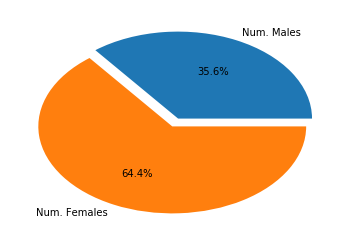

In [64]:
#Plot a figure
fig = plt.figure(figsize=(6,4)) 
# Plot pieplot 
plt.pie([num_male,num_female], labels = ['Num. Males' , 'Num. Females'], explode = (0, 0.1), autopct='%1.1f%%')


## 2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [87]:
# Get smaller df with relevant values
titanic1 = titanic[['fare', 'age', 'sex']]
# Drop all missing values
titanic_no_missing = titanic1.dropna()

In [89]:
# Create grouped df by sex
grouped = titanic_no_missing.groupby('sex')[['fare']]


In [102]:
# Convert groupby object to list with whic hwe can work and create values for the graphs
male_female = [group for _, group in grouped]

<class 'list'>


In [99]:
# Assign needed values female_ages, male_ages, female_fares, male_fares
female_ages = male_female[0]['age'].values
male_ages = male_female[1]['age'].values
female_fares = male_female[0]['fare'].values
male_fares = male_female[1]['fare'].values

[]

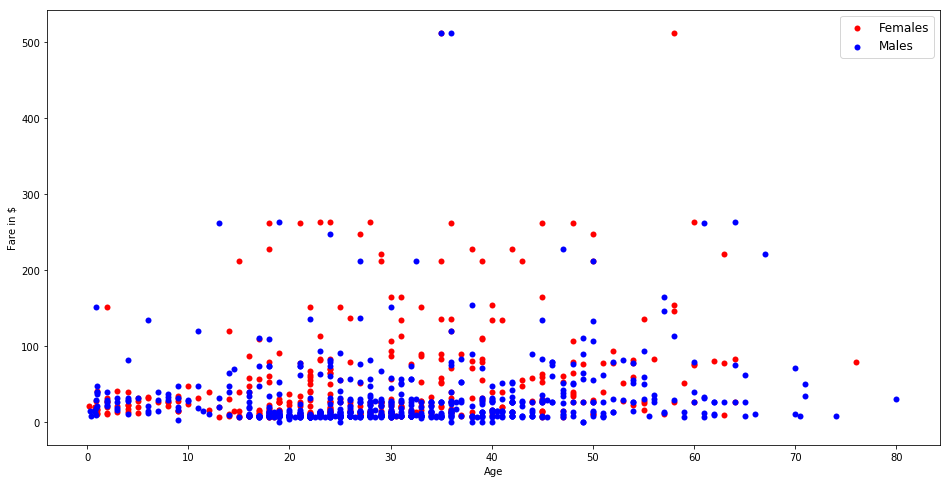

In [367]:
# Create figure
fig = plt.figure(figsize=(16,8))
# Scatterplot for female and male
plt.scatter(female_ages, female_fares, color = 'r', linewidths = 0.0001, label = 'Females')
plt.scatter(male_ages, male_fares, color = 'b', linewidths = 0.0001, label = 'Males')
# Create legend and increase fontsize
plt.legend(fontsize = 'large')
# Name labels and finally plot
plt.xlabel('Age')
plt.ylabel('Fare in $')
plt.plot()

# Task 2:

It happens all the time: someone gives you data containing malformed strings, Python, lists and
missing data. How do you tidy it up so you can get on with the analysis?
Take this monstrosity as the DataFrame to use in the following puzzles:
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm',
'Budapest_PaRis', 'Brussels_londOn'],
'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],

'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', '12. Air France', '"Swiss Air"']})

1. Some values in the the FlightNumber column are missing. These numbers are meant to
increase by 10 with each row so 10055 and 10075 need to be put in place. Fill in these missing
numbers and make the column an integer column (instead of a float column).
2. The From_To column would be better as two separate columns! Split each string on the
underscore delimiter _ to give a new temporary DataFrame with the correct values. Assign the
correct column names to this temporary DataFrame.
3. Notice how the capitalisation of the city names is all mixed up in this temporary DataFrame.
Standardise the strings so that only the first letter is uppercase (e.g. "londON" should become
"London".)
4. Delete the From_To column from df and attach the temporary DataFrame from the previous
questions.
5. In the RecentDelays column, the values have been entered into the DataFrame as a list. We
would like each first value in its own column, each second value in its own column, and so on. If
there isn't an Nth value, the value should be NaN.
Expand the Series of lists into a DataFrame named delays, rename the columns delay_1,
delay_2, etc. and replace the unwanted RecentDelays column in df with delays.

In [341]:
# Create dataframe 
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 'Budapest_PaRis', 'Brussels_londOn'], 'FlightNumber': [10045, np.nan, 10065, np.nan, 10085], 'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],

'Airline': ['KLM(!)', ' (12)', '(British Airways. )', '12. Air France', '"Swiss Air"']})

In [342]:
df

,Airline,FlightNumber,From_To,RecentDelays
0,KLM(!),10045.0,LoNDon_paris,"[23, 47]"
1,(12),NaN,MAdrid_miLAN,[]
2,(British Airways. ),10065.0,londON_StockhOlm,"[24, 43, 87]"
3,12. Air France,NaN,Budapest_PaRis,[13]
4,"""Swiss Air""",10085.0,Brussels_londOn,"[67, 32]"


### 1. Some values in the the FlightNumber column are missing. These numbers are meant to increase by 10 with each row so 10055 and 10075 need to be put in place. Fill in these missing numbers and make the column an integer column (instead of a float column).

In [343]:
# Create new column with interpolate function and cast values to int type
df['FlightNumberComplete'] = df["FlightNumber"].interpolate().astype(int)
# Drop old column with missing values
df.drop('FlightNumber', axis = 1, inplace = True)

### 2. The FromTo column would be better as two separate columns! Split each string on the underscore delimiter to give a new temporary DataFrame with the correct values. Assign the correct column names to this temporary DataFrame.

In [344]:
# Create new dataframe with values of previous series split by delimiter '_' into two new series 'from' and 'to'
fromto = pd.DataFrame(df['From_To'].str.split('_').tolist(), columns = ['from','to'])
fromto

,from,to
0,LoNDon,paris
1,MAdrid,miLAN
2,londON,StockhOlm
3,Budapest,PaRis
4,Brussels,londOn


### 3. Notice how the capitalisation of the city names is all mixed up in this temporary DataFrame. Standardise the strings so that only the first letter is uppercase (e.g. "londON" should become "London".)

In [345]:
fromto['From'] = fromto['from'].str.title()
fromto['To'] = fromto['to'].str.title()

### 4. Delete the From_To column from df and attach the temporary DataFrame from the previous questions.

In [346]:
df.drop('From_To', axis = 1, inplace = True)
df['From'], df['To'] = fromto['From'], fromto['To']

In [347]:
df

,Airline,RecentDelays,FlightNumberComplete,From,To
0,KLM(!),"[23, 47]",10045,London,Paris
1,(12),[],10055,Madrid,Milan
2,(British Airways. ),"[24, 43, 87]",10065,London,Stockholm
3,12. Air France,[13],10075,Budapest,Paris
4,"""Swiss Air""","[67, 32]",10085,Brussels,London


### 5. In the RecentDelays column, the values have been entered into the DataFrame as a list. We would like each first value in its own column, each second value in its own column, and so on. If there isn't an Nth value, the value should be NaN. Expand the Series of lists into a DataFrame named delays, rename the columns delay_1, delay_2, etc. and replace the unwanted RecentDelays column in df with delays.

In [348]:
# Find out how long is the longest list which defines the number of new columns created
num_max_columns = df['RecentDelays'].map(lambda x: len(x)).max()

In [349]:
# Create names for columns in a list
columns = []
for x in range(1, num_max_columns+1):
    columns.append('delay_{}'.format(x))

In [351]:
# Create columns in df and fill with NaN
for column in columns:
    df[column] = np.nan
df

,Airline,RecentDelays,FlightNumberComplete,From,To,delay_1,delay_2,delay_3
0,KLM(!),"[23, 47]",10045,London,Paris,NaN,NaN,NaN
1,(12),[],10055,Madrid,Milan,NaN,NaN,NaN
2,(British Airways. ),"[24, 43, 87]",10065,London,Stockholm,NaN,NaN,NaN
3,12. Air France,[13],10075,Budapest,Paris,NaN,NaN,NaN
4,"""Swiss Air""","[67, 32]",10085,Brussels,London,NaN,NaN,NaN


In [362]:
# Fill in the real values
for row in range(len(df)): # Iterate through df rows
    for value in df['RecentDelays'][row]: # Iterate through values in list of row RecentDelays
        df['delay_{}'.format(df['RecentDelays'][row].index(value)+1)][row] = int(value) #Fill Values regarding to index in list to new delay columns


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [363]:
df

,Airline,RecentDelays,FlightNumberComplete,From,To,delay_1,delay_2,delay_3
0,KLM(!),"[23, 47]",10045,London,Paris,23.0,47.0,NaN
1,(12),[],10055,Madrid,Milan,NaN,NaN,NaN
2,(British Airways. ),"[24, 43, 87]",10065,London,Stockholm,24.0,43.0,87.0
3,12. Air France,[13],10075,Budapest,Paris,13.0,NaN,NaN
4,"""Swiss Air""","[67, 32]",10085,Brussels,London,67.0,32.0,NaN


In [366]:
# Drop unwanted "RecentDelay" column
df.drop('RecentDelays', axis = 1)

,Airline,FlightNumberComplete,From,To,delay_1,delay_2,delay_3
0,KLM(!),10045,London,Paris,23.0,47.0,NaN
1,(12),10055,Madrid,Milan,NaN,NaN,NaN
2,(British Airways. ),10065,London,Stockholm,24.0,43.0,87.0
3,12. Air France,10075,Budapest,Paris,13.0,NaN,NaN
4,"""Swiss Air""",10085,Brussels,London,67.0,32.0,NaN
